# PCA / FAMD

This notebook explores whether PCA or alternatives can be used to meaningfully reduce the dimensions of our datasets (goat and cattle) before running ML models.

We have 26 variables (not counting the outcomes, wave, and id). Of those 26 variables, only the following 6 are numeric in nature:
'age_constant', 'buy_nr_goat', 'n_previd_goat', 'number_minors', 'number_adults', 'ratio_insured_goat'.

PCA is designed for numeric data as it calculates components that maximise the captured variance of the variables. However, the concept of variance does not apply the same to categorical variables even when one-hot encoded. One alternative is Factor Analysis for Mixed Data (FAMD). It handles both numeric and categorical data. Numeric variables are treated the same way as in PCA, that is the are standardised to have a mean of 0 and a standard deviation of 1. Categorical variables are first one-hot encoded, and then weighed by their modality's probablility (less frequent categories get a higher weight) to account for less frequent categories. Together PCA is then applied to the resulting dataframe with numeric and cateogircal variables.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import os
from sklearn.preprocessing import StandardScaler
#!pip install prince
import prince   # for FAMD !

os.chdir('C:/Users/Marion Späth/Desktop/ADS/Thesis/Data')

goat = pd.read_excel("goat_df.xlsx")
cattle = pd.read_excel("cattle_df.xlsx")
goat.head(2)

,Unnamed: 0,id,wave,afm_language,age_constant,agric_land,amh_language,educ_recoded_constant,eng_language,expend,...,main_info_source_recoded,religion_recoded,owns_phone,household_moved,purchase_bin,why_not_purchase_recoded,know_vip,trust_vip,advise_vip,ratio_insured_goat
0,0,1,4,No,25,Yes,No,Never attended,No,0,...,Interpersonal Sources,Traditional/Wakefata,0,No,No,Lack of Awareness or Understanding,Yes,Yes,Yes,0.0
1,1,2,4,Yes,27,Yes,No,Adult Education,No,0,...,Interpersonal Sources,Traditional/Wakefata,0,No,No,"Financial, Practical, and Situational Constraints",Yes,Yes,Yes,0.0


In [2]:
print(goat.shape)
print(goat.columns)

(4403, 31)
Index(['Unnamed: 0', 'id', 'wave', 'afm_language', 'age_constant',
       'agric_land', 'amh_language', 'educ_recoded_constant', 'eng_language',
       'expend', 'irrigated_land_bin', 'buy_goat', 'buy_nr_goat',
       'n_previd_goat', 'cs_cs_diff_post_goat', 'cs_cs_ratio_post_goat',
       'number_minors', 'educ_child_recoded', 'activity_child_recoded',
       'household_description', 'number_adults', 'main_info_source_recoded',
       'religion_recoded', 'owns_phone', 'household_moved', 'purchase_bin',
       'why_not_purchase_recoded', 'know_vip', 'trust_vip', 'advise_vip',
       'ratio_insured_goat'],
      dtype='object')


In [3]:
pca_vars = goat[['afm_language', 'age_constant', 'agric_land', 'amh_language', 'educ_recoded_constant', 'eng_language', 'expend', 'irrigated_land_bin', 'buy_goat', 'buy_nr_goat', 
                 'n_previd_goat', 'number_minors', 'educ_child_recoded', 'activity_child_recoded', 'household_description', 'number_adults', 'main_info_source_recoded', 'religion_recoded',
                  'owns_phone', 'household_moved', 'purchase_bin', 'why_not_purchase_recoded', 'know_vip', 'trust_vip', 'advise_vip', 'ratio_insured_goat']]
pca_vars.head(2)

,afm_language,age_constant,agric_land,amh_language,educ_recoded_constant,eng_language,expend,irrigated_land_bin,buy_goat,buy_nr_goat,...,main_info_source_recoded,religion_recoded,owns_phone,household_moved,purchase_bin,why_not_purchase_recoded,know_vip,trust_vip,advise_vip,ratio_insured_goat
0,No,25,Yes,No,Never attended,No,0,1,Not buy,0,...,Interpersonal Sources,Traditional/Wakefata,0,No,No,Lack of Awareness or Understanding,Yes,Yes,Yes,0.0
1,Yes,27,Yes,No,Adult Education,No,0,0,Not buy,0,...,Interpersonal Sources,Traditional/Wakefata,0,No,No,"Financial, Practical, and Situational Constraints",Yes,Yes,Yes,0.0


In [4]:
# Specify columns to convert
categorical_columns = ['afm_language', 'agric_land', 'amh_language', 'educ_recoded_constant', 'eng_language', 'expend', 'irrigated_land_bin', 'buy_goat', 
                       'educ_child_recoded', 'activity_child_recoded', 'household_description', 'main_info_source_recoded', 'religion_recoded', 'owns_phone', 'household_moved',
                        'purchase_bin', 'why_not_purchase_recoded', 'know_vip', 'trust_vip', 'advise_vip']
numeric_columns = ['buy_nr_goat', 'n_previd_goat', 'ratio_insured_goat', 'age_constant', 'number_adults', 'number_minors']

# Convert to categorical
pca_vars[categorical_columns] = pca_vars[categorical_columns].astype('category')


C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_14256\2277696608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_vars[categorical_columns] = pca_vars[categorical_columns].astype('category')


In [ ]:
# One-hot encode categorical columns
#pca_vars = pd.get_dummies(pca_vars, columns=categorical_columns, drop_first=True)

# Standardize numeric columns
#pca_vars[numeric_columns] = pca_vars[numeric_columns].apply(pd.to_numeric)
#scaler = StandardScaler()
#pca_vars[numeric_columns] = scaler.fit_transform(pca_vars[numeric_columns])

In [14]:
# Apply FAMD
#famd = prince.FAMD(n_components=50, random_state=42)
#famd = famd.fit(pca_vars)

famd = prince.FAMD(n_components=20, n_iter=3, copy=True, check_input=True, random_state=42, engine="sklearn", handle_unknown="error")
famd = famd.fit(pca_vars)

## Plot Eigenvalues 

Alternatively, replace eigenvalues_ with percentage_of_variance_ or cumulative_percentage_of_variance_

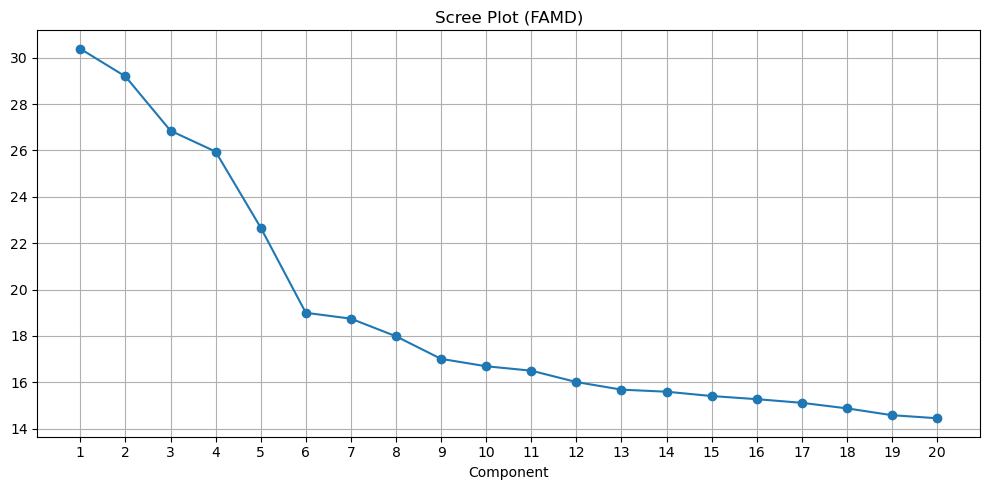

In [15]:
# Scree plot (explained inertia)
plt.figure(figsize=(10, 5))
plt.plot(range(1,len(famd.eigenvalues_)+1), famd.eigenvalues_, marker='o') # eigenvalues_ percentage_of_variance_ cumulative_percentage_of_variance_
plt.title('Scree Plot (FAMD)')
plt.xlabel('Component')
plt.ylabel('')
plt.xticks(range(1, len(famd.eigenvalues_)+1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
print("famd.eigenvalues_", famd.eigenvalues_, "\n")
#print("famd.eigenvalues_summary_", famd.eigenvalues_summary, "\n")
print("famd.cumulative_percentage_of_variance_", famd.cumulative_percentage_of_variance_)
print("percentage_of_variance_", famd.percentage_of_variance_)

famd.eigenvalues_ [30.38189124 29.19041466 26.84906738 25.94717985 22.66985429 18.99650431
 18.74378669 17.9827092  17.009036   16.6903237  16.50021992 16.01013799
 15.68173946 15.59269716 15.40651486 15.27112124 15.11345461 14.87428919
 14.58017779 14.44828772] 

famd.cumulative_percentage_of_variance_ [ 1.14067547  2.23661745  3.24465453  4.2188306   5.06996086  5.78317671
  6.48690439  7.16205773  7.80065491  8.42728618  9.04678007  9.64787405
 10.23663843 10.82205977 11.40049096 11.97383886 12.54126723 13.09971623
 13.64712294 14.1895779 ]
percentage_of_variance_ [1.14067547 1.09594198 1.00803707 0.97417608 0.85113025 0.71321586
 0.70372768 0.67515334 0.63859718 0.62663126 0.6194939  0.60109397
 0.58876439 0.58542133 0.57843119 0.5733479  0.56742837 0.558449
 0.54740671 0.54245495]


In [18]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,30.382,1.14%,1.14%
1,29.190,1.10%,2.24%
2,26.849,1.01%,3.24%
3,25.947,0.97%,4.22%
4,22.670,0.85%,5.07%
5,18.997,0.71%,5.78%
6,18.744,0.70%,6.49%
7,17.983,0.68%,7.16%
8,17.009,0.64%,7.80%


### !
Below we see the problem with FAMD in Python: numeric variables get one-hot encoded the same way as categorical variables. This explodes the data, possible components, and hinders interpretation.
FAMD is better implemented in R.

In [19]:
#famd.column_contributions_
famd.feature_names_in_

['ratio_insured_goat',
 'activity_child_recoded_House/domestic work',
 'activity_child_recoded_Not working',
 'activity_child_recoded_Student',
 'activity_child_recoded_Working',
 'activity_child_recoded_Working with Livestock',
 'advise_vip_No',
 'advise_vip_Yes',
 'afm_language_No',
 'afm_language_Yes',
 'age_constant_14',
 'age_constant_15',
 'age_constant_16',
 'age_constant_17',
 'age_constant_18',
 'age_constant_19',
 'age_constant_20',
 'age_constant_21',
 'age_constant_22',
 'age_constant_23',
 'age_constant_24',
 'age_constant_25',
 'age_constant_26',
 'age_constant_27',
 'age_constant_28',
 'age_constant_29',
 'age_constant_30',
 'age_constant_31',
 'age_constant_32',
 'age_constant_33',
 'age_constant_34',
 'age_constant_35',
 'age_constant_36',
 'age_constant_37',
 'age_constant_38',
 'age_constant_39',
 'age_constant_40',
 'age_constant_41',
 'age_constant_42',
 'age_constant_43',
 'age_constant_44',
 'age_constant_45',
 'age_constant_46',
 'age_constant_47',
 'age_constan